<div class='alert alert-info'>
    <h1 align="center">A Simple Neural Network</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction to Neural Networks

Neural networks have revolutionized various fields, from image recognition to natural language processing. At their core, neural networks are mathematical models inspired by the human brain's neural structure. They consist of interconnected nodes, or neurons, organized into layers. Each neuron processes information and passes it on to the next layer, enabling the network to learn complex patterns and make predictions.

A single-layer network without hidden layers is the simplest form of a neural network. This type of network is essentially performing **logistic regression**. It is a fundamental machine learning technique used for binary classification tasks, where the model predicts the probability of an instance belonging to a certain class (usually 0 or 1). Despite its name, logistic regression is not a neural network in the traditional sense but serves as a good starting point to understand the concepts underlying neural networks.

## Key Concepts of Logistic Regression:

1. **Linear Combination:** Logistic regression calculates a linear combination of the input features weighted by coefficients.

2. **Activation Function:** Unlike other neural networks that use more complex activation functions, logistic regression uses the sigmoid function to squash the output into a probability score between 0 and 1.

3. **Loss Function:** The model is trained using a loss function such as binary cross-entropy, which measures the difference between the predicted probabilities and the actual labels.

4. **Optimization:** The training goal is to optimize the model's coefficients (weights) to minimize the loss function, typically using techniques like gradient descent.

While logistic regression isn't a neural network with hidden layers, it forms the foundation upon which more complex neural architectures are built. Understanding its principles provides a solid starting point for delving into deeper neural network structures and their applications.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# The Breast Cancer Wisconsin (Diagnostic) dataset

The Breast Cancer Wisconsin (Diagnostic) dataset is widely used in machine learning and medical research. It was originally collected at the University of Wisconsin Hospitals, Madison, USA, and donated to the UCI Machine Learning Repository.

## Dataset Overview
The dataset is designed for binary classification tasks where the goal is to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous). The dataset contains features computed from digitized images of fine needle aspirate (FNA) of breast mass. These features are computed from a digitized image of a breast mass and describe characteristics of the cell nuclei present in the image. The target variable, which is the variable we want to predict, indicates the diagnosis of the tumor. A diagnosis of "M" indicates malignant (cancerous), and "B" indicates benign (non-cancerous).

Citation: <br>
Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1995). Breast Cancer Wisconsin (Diagnostic) dataset. UCI Machine Learning Repository. Retrieved from https://doi.org/10.24432/C5DW2B.

The following Python code snippet fetches the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI Machine Learning Repository using the fetch_ucirepo function. It retrieves the dataset's features (X) and targets (y) as Pandas DataFrames, making it ready for further analysis and model development.

You may need to install `fetch_ucirepo` through `pip install ucimlrepo`.

In [2]:
# Import the fetch_ucirepo function from the ucimlrepo module to
# fetch datasets from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset
# The id=17 parameter indicates which dataset to fetch
breast_cancer = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# variable information 
print(breast_cancer.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [3]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


Since the target column contains `M` and `B`, we need to use `map` function to manually map them to 0 and 1.

In [5]:
# Convert y from dataframe to a series
y_series = y.squeeze()

# Map 'M' to 0 and 'B' to 1
y_mapped = y_series.map({'M': 0, 'B': 1})

# Convert the Series back to a DataFrame
y = y_mapped.to_frame(name='Diagnosis')

y.head()

,Diagnosis
0,0
1,0
2,0
3,0
4,0


It's generally considered best practice to split the data into training and test sets before scaling. This ensures that the scaling is based only on the training data, which helps to prevent data leakage. Data leakage can occur if information from the test set influences the scaling parameters, leading to overly optimistic performance estimates.

Scaling after splitting ensures that the test set remains completely unseen during the training process. It simulates a real-world scenario where the model is applied to new, unseen data.

Correct Procedure:
- **Split the data**: Divide the dataset into training and test sets.
- **Fit the scaler on the training data**: Compute the scaling parameters (mean and standard deviation) from the training data only.
- **Transform both the training and test data**: Apply the same scaling parameters to both sets.

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [8]:
# Convert the scaled arrays back to DataFrames for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [9]:
# Number of training samples and features
X_train_scaled.shape

(455, 30)

# General Architecture

Let's design a simple algorithm to predict the diagnosis of the tumor, malignant (cancerous) or benign (non-cancerous). We will build a Logistic Regression using a Neural Network mindset. The following Figure explains why Logistic Regression is a simple Neural Network!

<center> <img src="LogReg_NN.png" style="width:450px">  </center>

## Mathematical Expression

For one example $x^{(i)}$:
$$z^{(i)} = x^{(i)} w + b$$

$$\hat{y}^{(i)} = sigmoid(z^{(i)})$$ 

$$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})$$

# Building the Neural Network
Building a neural network involves several key steps, each crucial for creating a model to learn from data and make accurate predictions. Here are the main steps to build a neural network:

1. **Define the Problem**    
    Gather the dataset you'll use for training and testing. Ensure the data is cleaned and preprocessed (e.g., normalization, handling missing values).

1. **Choose the Architecture**    
    Decide whether to use a feedforward neural network, convolutional neural network (CNN), recurrent neural network (RNN), etc., based on the problem. Also, choose the number of layers and the number of neurons in each layer.

1. **Initialize the Network**    
    Start with random values for weights and biases. Proper initialization can help the network converge faster.

1. **Set Up the Training Process**    
    Choose the activation functions (ReLU, Sigmoid, Tanh, etc.) depending on the layer and the problem.    
    Select the loss function (Mean Squared Error, Cross-Entropy) to measure the network's performance.    
    Choose the optimization algorithm (Gradient Descent, Adam, RMSprop, etc.) to update the weights during training.    
    Set the learning rate to determine the step size at each iteration while moving toward a minimum of the loss function.

1. **Train the Network**    
    *Feedforward pass*: Pass the input data through the network to get the output.    
    *Calculate the loss*: Compute the difference between the predicted and actual outputs using the loss function.    
    *Backpropagation*: Calculate the gradient of the loss function for each weight using the chain rule and update the weights to minimize the loss.    
    *Iterate over epochs*: Repeat several epochs' feedforward and backpropagation steps.

1. **Evaluate the Network**    
    Use a separate validation dataset to check how well the network generalizes to unseen data. Monitor metrics such as accuracy, precision, recall, F1 score, etc. Then, hyperparameters like learning rate, number of layers, number of neurons, etc., can be adjusted to improve performance.

1. **Test the Network**    
    After training and validation, test the final model on a separate test dataset to evaluate its performance. Check for overfitting, underfitting, and other issues. Ensure the model performs well on the test set.

## Neural Network Structure for the Breast Cancer

The main steps to build a very simple neural network for our classification problem are as follows:
1. Define the model structure (such as the number of input features)
1. Initialize the model's parameters
1. Loop:
    1. Calculate current loss (forward propagation)
    1. Calculate current gradient (backward propagation)
    1. Update parameters (gradient descent)

### 1. Model Structure

- The number of input features is 30.
- There is no hidden layer for this network. So, we have one input layer with 32 neurons and one output layer with one neuron.
- The activation function for the output layer is sigmoid.

### 2. Parameter Initialization

Initializing weights to zero in a neural network is generally not recommended because it can lead to issues during training. When weights are initialized to zero, every neuron in the network receives the same gradient during backpropagation. This means that all neurons in each layer will update their weights in the same way, effectively learning the same features and not taking advantage of the neural network’s ability to learn diverse and complex features. Also, with zero initialization, the symmetry between neurons prevents the network from breaking the symmetry, leading to poor learning dynamics and a failure to converge to a good solution.

To avoid the issues of zero initialization, several alternative initialization methods can be used:

- Random Initialization: Initialize weights with small random values to break symmetry.    
  - Uniform Distribution: Draw weights from a uniform distribution, e.g., `np.random.uniform(low, high, size)`.
  - Normal Distribution: Draw weights from a normal distribution, e.g., `np.random.normal(mean, stddev, size)`.
- Xavier (Glorot) Initialization
- He Initialization

In our network with a single layer (input directly connected to output), there's no need to break symmetry across layers because all weights contribute directly to the output and receive independent gradients. So, it is fine to initialize all weights to zero.

In [10]:
def initialize_parameters(layers_dims, method='random_normal'):
    """
    Initialize the parameters of a neural network.

    Arguments:
    layers_dims -- python list containing the dimensions of each layer in the network
    method -- method to initialize the parameters: 'zeros', 'random_uniform', 'random_normal'

    Returns:
    parameters -- python dictionary containing the parameters "w1", "b1", ..., "wL", "bL":
                  wl -- weight matrix of shape (layers_dims[l-1], layers_dims[l])
                  bl -- bias vector of shape (layers_dims[l], 1)
    """
    np.random.seed(1)  # for reproducibility
    parameters = {}
    L = len(layers_dims)  # number of layers in the network

    for l in range(1, L):
        if method == 'zeros':
            parameters['w' + str(l)] = np.zeros((layers_dims[l-1], layers_dims[l]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        elif method == 'random_uniform':
            parameters['w' + str(l)] = np.random.uniform(low=-0.01, high=0.01,
                                                         size=(layers_dims[l-1], layers_dims[l]))
            parameters['b' + str(l)] = np.random.uniform(low=-0.01, high=0.01,
                                                         size=(layers_dims[l], 1))
        elif method == 'random_normal':
            parameters['w' + str(l)] = np.random.randn(layers_dims[l-1], layers_dims[l]) * 0.01
            parameters['b' + str(l)] = np.random.randn(layers_dims[l], 1) * 0.01
        else:
            raise ValueError("Invalid initialization method: choose from 'zeros', 'random_uniform', or 'random_normal'")

    return parameters

In [11]:
# Initialize with zeros
parameters = initialize_parameters(layers_dims=[30, 1], method='zeros')

# Initial values for weights of layer 1
w0 = parameters['w1']
b0 = parameters['b1']

### Forward and Backward Propagation

After initialization, you can do the "forward" and "backward" propagation steps to learn the parameters.
### 3.A. Forward Propagation
Forward propagation is the process of passing input data through a neural network to generate an output. This involves the following steps:

1. **Input Layer**: The input data is fed into the network.
1. **Linear Transformation**: For each neuron in the network, a linear combination of the input values is computed using the weights and biases, where $w$ is the weight matrix, $X$ is the input data for the first layer, and $b$ is the bias vector.

    $$ Z = X w + b $$
   
1. **Activation Function**: The linear combination is passed through an activation function (e.g., ReLU, Sigmoid, Tanh) to introduce non-linearity.

   $$ A = \sigma (Z) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)}) $$

### 3.B. Backward Propagation
Backward propagation is the process of updating the network's weights and biases to minimize the error between the predicted output and the actual target values. This involves the following steps:

1. **Compute the Loss**: Calculate the loss (error) between the network's prediction and the actual target values using a loss function (e.g., Mean Squared Error, Cross-Entropy).
   $$ J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})) $$

1. **Calculate Gradients**:
    $$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(A-Y)$$
    
    $$ \frac{\partial J}{\partial b} = \frac{1}{m}(A-Y)$$

In [12]:
def propagate(w, b, X, y):
    """
    Implement the cost function and its gradient for the propagation.

    Arguments:
    w -- weights, a NumPy array of size (num_features, 1)
    b -- bias, a scalar
    X -- data of size (num_features, num_examples)
    y -- true "label" vector containing 0 if malignant, or 1 if benign
         of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression

    """
    # Number of examples
    m = X.shape[0]
    
    # Forward propogation (from X to cost)
    # Compute the linear combination of inputs and weights, and add the bias
    z = np.dot(X, w) + b
    
    # Compute the activation using the sigmoid function
    A = 1 / (1 + np.exp(-z))

    # Compute the cost using the logistic regression loss formula
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    # Backward propogation (to find gradients)
    # Calculate the gradient of the loss with respect to w
    dw = 1/m * np.dot(X.T, (A - y))
    
    # Calculate the gradient of the loss with respect to b
    db = 1/m * np.sum(A - y)
    
    # Ensure cost is a scalar (use np.squeeze to remove any dimensions of size 1)
    cost = np.squeeze(cost)

    # Store gradients in a dictionary
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

### 3.C. Optimization

Update the weights and biases using the computed gradients and a chosen optimization algorithm (e.g., Gradient Descent, Adam).

$$ w = w - \alpha \ dw $$
$$ b = b - \alpha \ db $$

In [13]:
def optimize(w, b, X, y, iter=100, alpha=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_features, 1)
    b -- bias, a scalar
    X -- data of shape (num_features, num_examples)
    y -- true "label" vector containing 0 if malignant, or 1 if benign
         of size (1, number of examples)
    iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """
    
    # List to store the cost at each iteration    
    costs = []    
    
    for i in range(iter):
        # Forward and backward propagation to get the gradients and cost 
        grads, cost = propagate(w, b, X, y)
        
        # Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']
        # Update weights and bias using gradient descent
        w = w - alpha*dw
        b[0,0] = b[0,0] - alpha*db
        
        # Record the cost for every iteration
        costs.append(cost)
        
        if i % 100 == 0:
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    # Store updated parameters in a dictionary
    params = {'w': w, 'b': b}
    
    # Store final gradients in a dictionary
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w0, b0, X_train_scaled, y_train, iter=201)

w = params['w']
b = params['b']

print ('w = ' + str(w.reshape(-1)) + '\n')
print ('b = ' + str(b.reshape(-1)) + '\n')
print('Cost = ' + str(costs[-1]))

w = [-0.20739662 -0.1468206  -0.20810796 -0.19936036 -0.08890304 -0.12087406
 -0.16421007 -0.21210946 -0.07374842  0.05254998 -0.14953045  0.00608226
 -0.13774814 -0.14072597  0.02240312 -0.00188996  0.00943401 -0.05524626
  0.02039043  0.05705315 -0.22801034 -0.17175384 -0.22475895 -0.2116447
 -0.132874   -0.14107733 -0.16102068 -0.21645778 -0.13947035 -0.06213234]

b = [0.14837654]

Cost = 0.20009603314007174


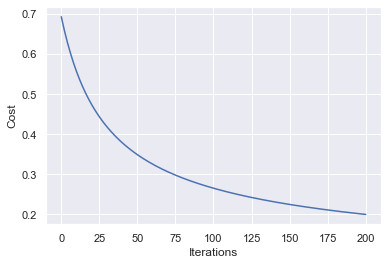

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

## Prediction

With the learned parameters $W$ and $b$, now we can predict the lable of a given sample. The prediction can be obtained babsed on the value of of activation in the last layer (a number between zero and one):
$$ \hat{y} = A = \sigma(X w + b)$$

If the actiation $\leq$ 0.5, the prediction is malignant (cancerous) and if the actication $>$ 0.5, the prediction is benign (non-cancerous).

In [16]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_features, 1)
    b -- bias, a scalar
    X -- data of size (num_features, num_examples)
    
    Returns:
    y_pred -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]  # number of examples

    y_pred = np.zeros((m, 1))
    
    # Compute the activation using the sigmoid function
    z = np.dot(X, w) + b
    A = 1 / (1 + np.exp(-z))
    
    for i in range(A.shape[0]):
        
        # Convert probabilities to actual predictions
        if A[i, 0] > 0.5:
            y_pred[i,0] = 1
        else:
            y_pred[i,0] = 0
    
    return y_pred

In [17]:
# Calculate the training set accuracy
y_pred = predict(w, b, X_train_scaled)
m = X_train_scaled.shape[0] # number of examples in the training dataset

print('Train Accuracy =', np.sum(y_pred == y_train.to_numpy())/m)

Train Accuracy = 0.9604395604395605


In [18]:
# Calculate the test set accuracy
y_pred = predict(w, b, X_test_scaled)
m = X_test_scaled.shape[0] # number of examples in the test dataset

print('Test Accuracy =', np.sum(y_pred == y_test.to_numpy())/m)

Test Accuracy = 0.9736842105263158
